In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import style
style.use("fivethirtyeight")
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

np.random.seed(42)  # to make this code example reproducible
m = 100
# Replace 'imports-85.csv' with the actual file path if it's not in the current directory
dataset_url = "https://raw.githubusercontent.com/plotly/datasets/master/imports-85.csv"

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(dataset_url)
df.fillna(value=0, inplace=True)

pd.set_option('display.max_columns', None)
df.head(10)


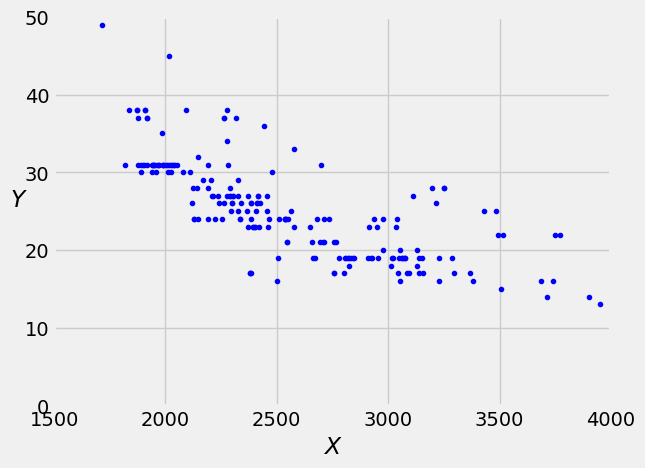

In [147]:
#GRABBING SPECIFIED DATA AND TARGET
target_column = df[['city-mpg']]
two_columns = df[['curb-weight', 'engine-size']]

X = two_columns.values
y = target_column.values
X = np.array(X)

plt.axis([1500, 4000, 0, 50])
plt.plot(X, y, "b.")
plt.xlabel("$X$")
plt.ylabel("$Y$", rotation=0)
plt.grid(visible=True)
plt.show()


In [ ]:
from sklearn.preprocessing import add_dummy_feature

#CREATING THETA
X_b = add_dummy_feature(X)
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
X_b.shape

(205, 3)

In [ ]:
theta_best

array([[ 4.92889282e+01],
       [-9.15301889e-03],
       [-5.34463681e-03]])

In [ ]:
#CREATING THE Y PREDICTION
X_new = np.array(X)
X_new_b = add_dummy_feature(X_new)
X_new_b.shape
y_predict = X_new_b @ theta_best

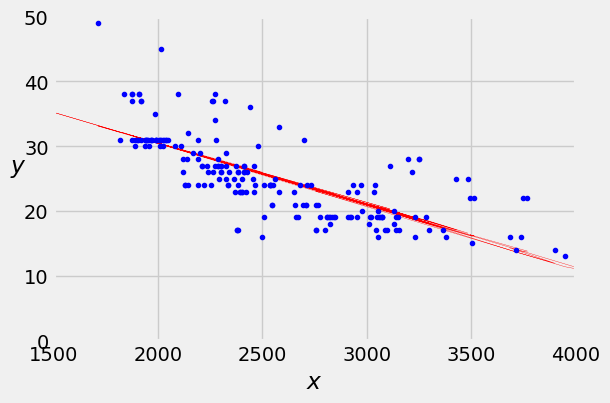

In [152]:
#CREATING THE LINEAR REGRESSION GRAPH
plt.figure(figsize=(6, 4))
plt.axis([1500, 4000, 0, 50])
plt.plot(X_new, y_predict, "r-", linewidth=0.25)
plt.plot(X, y, "b.")
plt.xlabel("$x$")
plt.ylabel("$y$", rotation=0)
plt.grid(visible=True)

plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
#LINEAR REGRESSION FIT
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

In [ ]:
#LINEAR REGRESSION PREDICTION
lin_reg.predict(X_new)

In [156]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[ 4.92889282e+01],
       [-9.15301889e-03],
       [-5.34463681e-03]])

In [157]:
np.linalg.pinv(X_b) @ y

array([[ 4.92889282e+01],
       [-9.15301889e-03],
       [-5.34463681e-03]])

In [158]:
theta_path_sgd = []

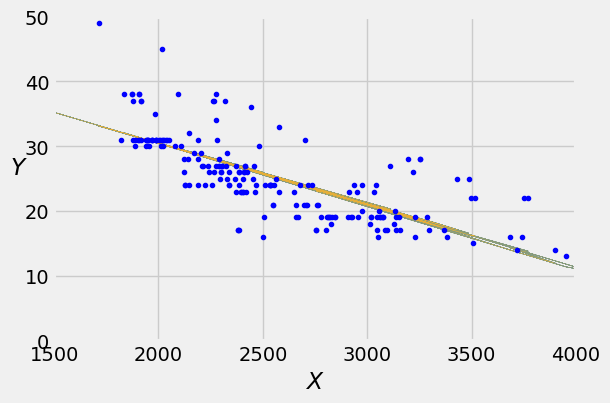

In [159]:
#STOCHASTIC GRADIENT DESCENT

n_epochs = 50
t0, t1 = 5, 50
def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(50)
theta = np.random.randn(2, 1)

n_shown = 20
plt.figure(figsize=(6, 4))
for epoch in range(n_epochs):
    for iteration in range(m):

        if epoch == 0 and iteration < n_shown:
          color = mpl.colors.rgb2hex(plt.cm.OrRd(iteration / n_shown + 0.15))
          plt.plot(X_new, y_predict, linewidth=0.25)


        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta_best - yi)
        eta = learning_schedule(epoch * m + iteration)
        theta = theta_best - eta * gradients
        theta_path_sgd.append(theta)

plt.axis([1500, 4000, 0, 50])
plt.plot(X, y, "b.")
plt.xlabel("$X$")
plt.ylabel("$Y$", rotation=0)

plt.grid(visible="true")
plt.show()